# T81-558: Applications of Deep Neural Networks
**Module 1: Python Preliminaries**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 1 Material

* Part 1.1: Course Overview [[Video]](https://www.youtube.com/watch?v=v8QsRio8zUM&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_01_1_overview.ipynb)
* Part 1.2: Introduction to Python [[Video]](https://www.youtube.com/watch?v=czq5d53vKvo&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_01_2_intro_python.ipynb)
* Part 1.3: Python Lists, Dictionaries, Sets and JSON [[Video]](https://www.youtube.com/watch?v=kcGx2I5akSs&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_01_3_python_collections.ipynb)
* **Part 1.4: File Handling** [[Video]](https://www.youtube.com/watch?v=FSuSLCMgCZc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_01_4_python_files.ipynb)
* Part 1.5: Functions, Lambdas, and Map/Reduce [[Video]](https://www.youtube.com/watch?v=jQH1ZCSj6Ng&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_01_5_python_functional.ipynb)

# Part 1.4: File Handling

Files will be used often during this class.  The most common three types of files that will be used are CSV files, Image files, and text files.

* **CSV files** (which have the .csv extension) hold data.
* **Image files** (which will usually have the .png or .jpg extension) hold images for computer vision.
* **Text files** (which will usually have the .txt extension) hold unstructured text and will be used for natural language processing.

Other file times will be seen briefly, such as [JSON](https://en.wikipedia.org/wiki/JSON) and [H5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format).

In this class we will get data from three primary locations:

* **Your Hard Drive** The filename will look something like: **c:\data\myfile.csv** or **/Users/jheaton/data/myfile.csv**.
* **The Internet** The filename will look something like: **https://data.heatonresearch.com/data/t81-558/iris.csv**.
* **The Cloud** Essentially your Google Drive.  This will have a file name like **/content/drive/My Drive/myfile.csv**.

### Read a CSV File
CSV files will be read with Pandas.  We will see more about Pandas in the next section, but for now, its general format is:

In [1]:
import pandas as pd

df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/iris.csv")

The above command loads [Fisher's Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) from the Internet.  It might take a few seconds to load, so it is good to keep the load in a separate Jupyter notebook cell so that you do not have to constantly reload it as you test your program.  You can load Internet data, local hard drive, and Google Drive data this way.

Now that the data is loaded, you can display the first 5 rows with this command.

In [2]:
display(df[0:5])

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Read an Image
Images can be loaded by similar means.

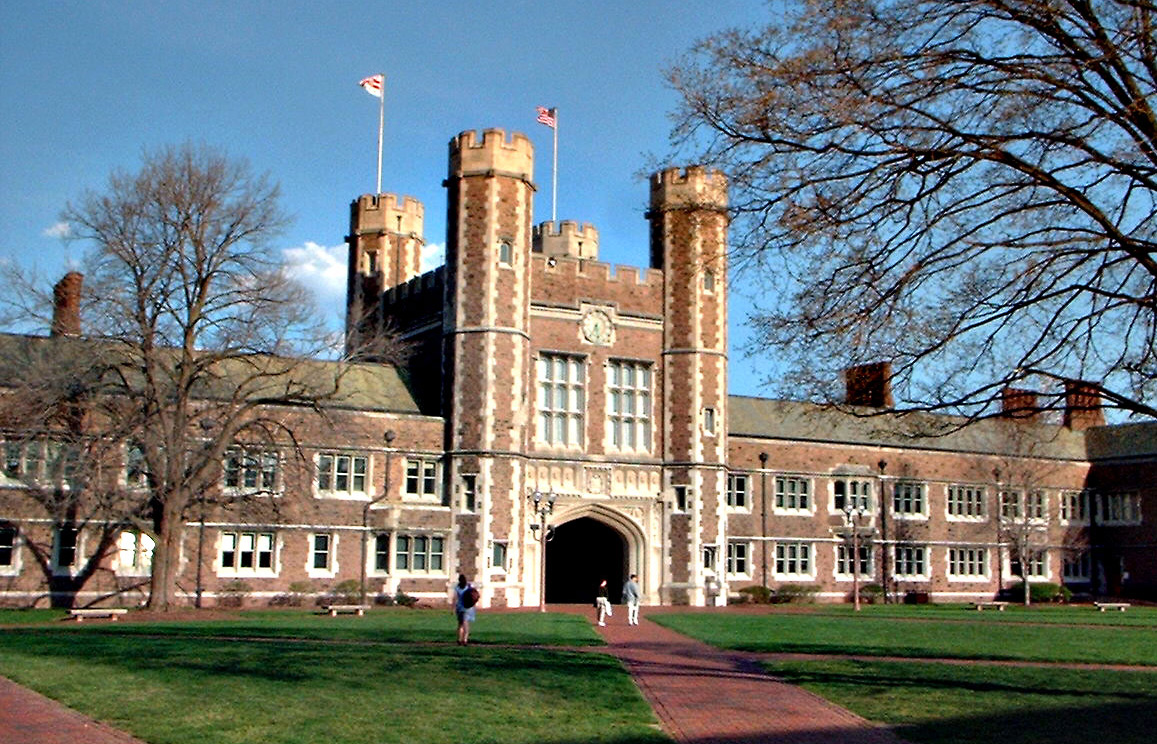

In [3]:
%matplotlib inline
from PIL import Image
import requests
from io import BytesIO

url = "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))

img

### Read (stream) a Large CSV File
Pandas will read the entire CSV file into memory. Usually, this is fine.  However, at times you may wish to "stream" a very large file.  This allows you to process this file one record at a time.  Because the file is not loaded into memory, you are able to process extremely large files.  The following code loads the Iris dataset and calculates averages, one row at a time.  This would work for extremely large files.

In [4]:
import csv
import urllib.request
import codecs
import numpy as np

url = "https://data.heatonresearch.com/data/t81-558/iris.csv"
urlstream = urllib.request.urlopen(url)
csvfile = csv.reader(codecs.iterdecode(urlstream, 'utf-8'))
next(csvfile) # Skip header row
sum = np.zeros(4)
count = 0

for line in csvfile:
    # Convert each row to Numpy array
    line2 = np.array(line)[0:4].astype(float)
    
    # If the line is of the right length (skip empty lines), then add
    if len(line2) == 4:
        sum += line2
        count += 1
        
# Calculate the average, and print the average of the 4 iris measurements (features)
print(sum/count)

[5.84333333 3.05733333 3.758      1.19933333]


### Read a Text File

The following code reads the [USA Declaration of Independence](https://en.wikipedia.org/wiki/United_States_Declaration_of_Independence) as a text file.  This code streams the document and reads it line-by-line.  This code could handle a very large file.

In [5]:
import urllib.request

url = "https://www.constitution.org/usdeclar.txt"
with urllib.request.urlopen(url) as urlstream:
    for line in codecs.iterdecode(urlstream, 'utf-8'):
        print(line.rstrip())

                      Declaration of Independence

                   [Adopted in Congress 4 July 1776]



   The Unanimous Declaration of the Thirteen United States of America

When, in the course of human events, it becomes necessary for one people to
dissolve the political bands which have connected them with another, and to
assume among the powers of the earth, the separate and equal station to
which the laws of nature and of nature's God entitle them, a decent respect
to the opinions of mankind requires that they should declare the causes
which impel them to the separation.

We hold these truths to be self-evident, that all men are created equal,
that they are endowed by their Creator with certain unalienable rights, that
among these are life, liberty and the pursuit of happiness. That to secure
these rights, governments are instituted among men, deriving their just
powers from the consent of the governed. That whenever any form of
government becomes destructive of these ends, it 